In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For Imputation
from sklearn.preprocessing import LabelEncoder

# For data preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_validate

# For model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For visualizing the descision tree
from sklearn import tree

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             log_loss,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)

from sklearn.pipeline import make_pipeline # For performing a series of operations

from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/oasis_longitudinal.csv')

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.shape

(373, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
df.describe() # for numerical cols

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Visit       1.041023
MR Delay    0.945037
Age         0.141700
EDUC       -0.025977
SES         0.221502
MMSE       -2.366086
CDR         1.319318
eTIV        0.496881
nWBV        0.234587
ASF         0.083450
dtype: float64

In [ ]:
df.MMSE.fillna(df.MMSE.median(),inplace=True)

In [ ]:
df.SES.fillna(df.SES.median(),inplace=True)

In [ ]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df.drop(columns='Hand',axis=1,inplace=True)

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [ ]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
# Reversing using mapping
ses_map = {5:1,4:2,3:3,2:4,1:5}
df.SES = df.SES.map(ses_map)

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,4,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,4,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,4,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,4,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,4,22.0,0.5,1698,0.701,1.034


In [ ]:
df.SES.value_counts()

4    122
5     88
3     82
2     74
1      7
Name: SES, dtype: int64

In [ ]:
df_copy = df.copy()
df.to_csv('oasis_longitude.csv')

In [ ]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Age             int64
EDUC            int64
SES             int64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [ ]:
gender_map = {'M':0, 'F':1}
df['Gender'] = df['M/F'].map(gender_map)

In [ ]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,5,28.0,0.5,1693,0.694,1.037,0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,5,26.0,0.5,1688,0.675,1.040,0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,4,30.0,0.0,1319,0.801,1.331,1
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,4,30.0,0.0,1327,0.796,1.323,1
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,65,13,4,30.0,0.0,1333,0.801,1.317,1


In [ ]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Age             int64
EDUC            int64
SES             int64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Gender          int64
dtype: object

In [ ]:
df.drop(columns='M/F',axis=1,inplace=True)

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,87,14,4,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,88,14,4,30.0,0.0,2004,0.681,0.876,0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,75,12,4,23.0,0.5,1678,0.736,1.046,0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,76,12,4,28.0,0.5,1738,0.713,1.010,0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,80,12,4,22.0,0.5,1698,0.701,1.034,0


In [ ]:
df.Group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [ ]:
target_map = {'Nondemented':0,'Demented':1,'Converted':2}

df['Group'] = df.Group.map(target_map)

In [ ]:
df.Group.value_counts()

0    190
1    146
2     37
Name: Group, dtype: int64

In [ ]:
corr = df.corr()
corr

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
Group,1.000000,-0.048434,-0.049262,0.049267,-0.100606,0.066154,-0.338224,0.572518,-0.056693,-0.258093,0.042848,-0.143918
Visit,-0.048434,1.000000,0.920009,0.183213,0.024615,0.049294,-0.027381,0.002325,0.117428,-0.126682,-0.120399,-0.069791
MR Delay,-0.049262,0.920009,1.000000,0.205357,0.051630,0.026247,0.066619,-0.062915,0.119624,-0.105586,-0.123545,-0.048006
Age,0.049267,0.183213,0.205357,1.000000,-0.027886,0.045410,0.055255,-0.026257,0.042348,-0.518359,-0.035067,0.037726
EDUC,-0.100606,0.024615,0.051630,-0.027886,1.000000,0.691222,0.192158,-0.153121,0.257015,-0.012200,-0.241752,-0.089279
SES,0.066154,0.049294,0.026247,0.045410,0.691222,1.000000,0.139943,-0.052313,0.249030,-0.092361,-0.240831,-0.048504
MMSE,-0.338224,-0.027381,0.066619,0.055255,0.192158,0.139943,1.000000,-0.674876,-0.036234,0.342189,0.044960,0.168530
CDR,0.572518,0.002325,-0.062915,-0.026257,-0.153121,-0.052313,-0.674876,1.000000,0.022819,-0.344819,-0.029340,-0.202140
eTIV,-0.056693,0.117428,0.119624,0.042348,0.257015,0.249030,-0.036234,0.022819,1.000000,-0.210122,-0.988877,-0.572549
nWBV,-0.258093,-0.126682,-0.105586,-0.518359,-0.012200,-0.092361,0.342189,-0.344819,-0.210122,1.000000,0.213476,0.249618


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


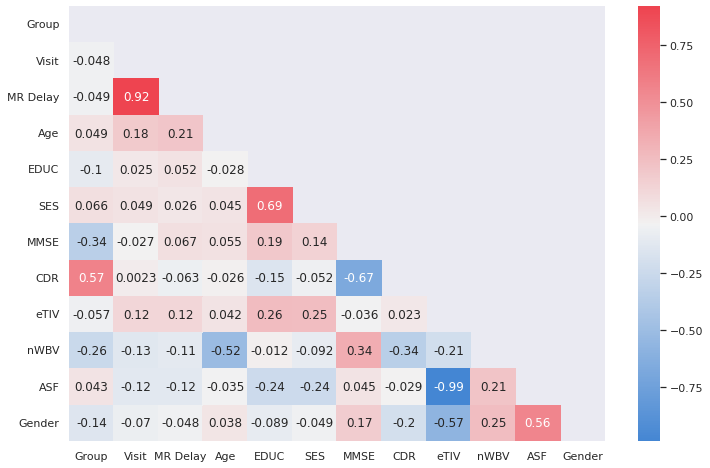

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the figure
fig, ax = plt.subplots(figsize=(12,8))

# Generate a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio (mask to not display upper triangle part)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, annot=True);
plt.savefig('corr.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


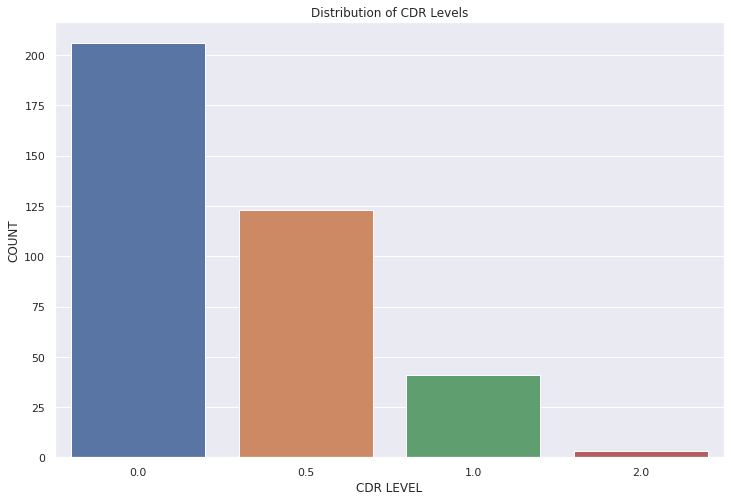

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['CDR'])
plt.title('Distribution of CDR Levels')
plt.xlabel('CDR LEVEL')
plt.ylabel('COUNT')
plt.savefig('CDR_distribution.png')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


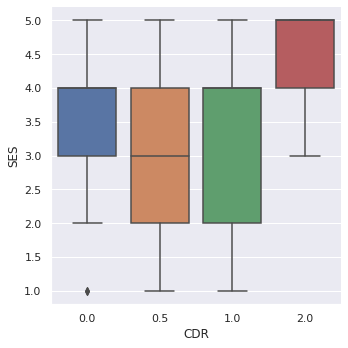

In [ ]:
sns.factorplot(x='CDR',y='SES',data=df,kind='box',size=5,aspect=1)

In [ ]:
a = df.SES.value_counts()

In [ ]:
list(a.index)

[4, 5, 3, 2, 1]

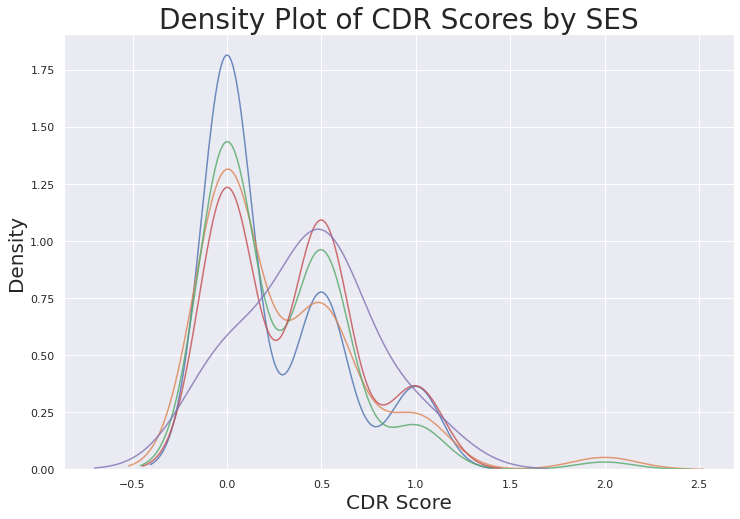

In [ ]:
# Create list of indicies of SES counts
ses_count = df['SES'].value_counts()
ses_indexes = list(ses_count.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 8))

# Plot each building
for s in ses_indexes:
    # Select the SES category
    subset = df[df['SES'] == s]

    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = s, shade = False, alpha = 0.8);

# label the plot
plt.xlabel('CDR Score', size = 20);
plt.ylabel('Density', size = 20);
plt.title('Density Plot of CDR Scores by SES', size = 28);
plt.savefig('SES_CDR.png')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


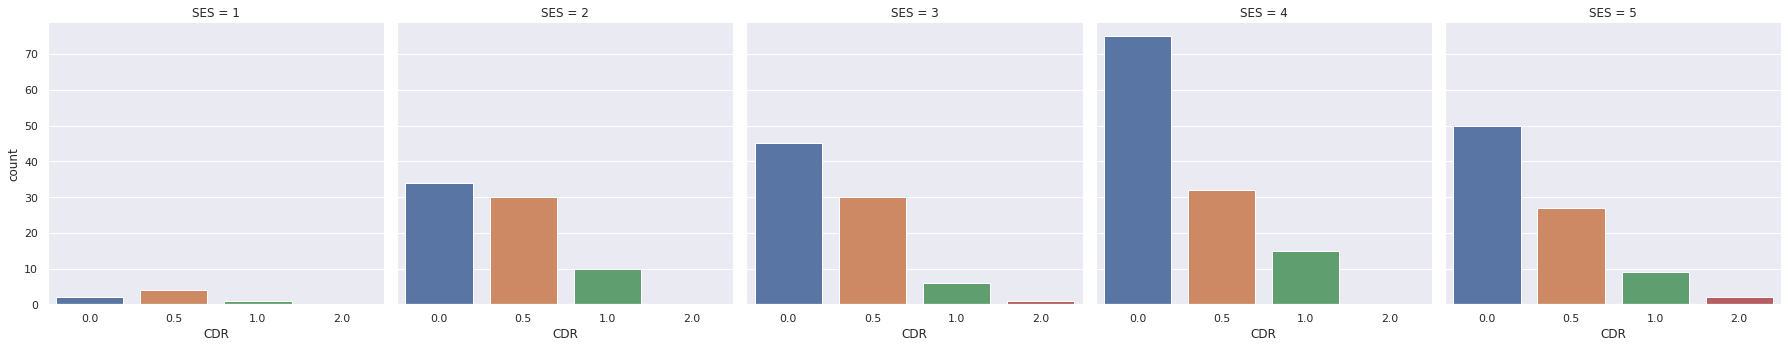

In [ ]:
sns.factorplot(x='CDR',kind='count',col='SES',data=df)

In [ ]:
df.EDUC.value_counts()

12    103
16     81
18     64
14     33
13     27
15     17
20     13
11     11
8       9
17      9
6       3
23      3
Name: EDUC, dtype: int64

In [ ]:
df.dtypes

Subject ID     object
MRI ID         object
Group           int64
Visit           int64
MR Delay        int64
Age             int64
EDUC            int64
SES             int64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Gender          int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

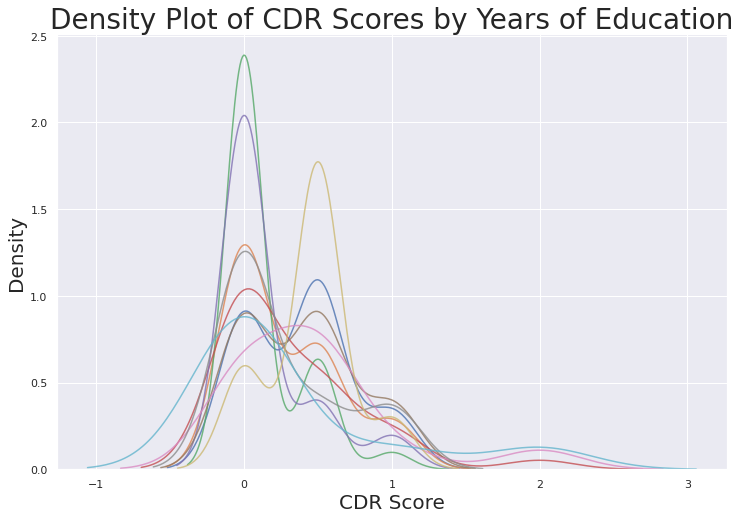

In [ ]:
# Create list of indicies of SES counts
edu_count= df['EDUC'].value_counts()
edu_index = list(edu_count.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 8))

# Plot each building
for el in edu_index:
    # Select the SES category
    subset = df[df['EDUC'] == el]

    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = el, shade = False, alpha = 0.8,bw=0.5);

# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of CDR Scores by Years of Education', size = 28);
#plt.xlim([0,2]);
plt.savefig('EDU_CDR.png')

In [ ]:
# Min and Max years of education among subjects
min_edu = df.loc[df['EDUC']==12]
max_edu = df.loc[df['EDUC']==16]

# Stack them into a combine dataframe
edu_concat = pd.concat([min_edu,max_edu])
edu_concat.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
2,OAS2_0002,OAS2_0002_MR1,1,1,0,75,12,4,23.0,0.5,1678,0.736,1.046,0
3,OAS2_0002,OAS2_0002_MR2,1,2,560,76,12,4,28.0,0.5,1738,0.713,1.010,0
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,80,12,4,22.0,0.5,1698,0.701,1.034,0
7,OAS2_0005,OAS2_0005_MR1,0,1,0,80,12,2,28.0,0.0,1689,0.712,1.039,0
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,83,12,2,29.0,0.5,1701,0.711,1.032,0


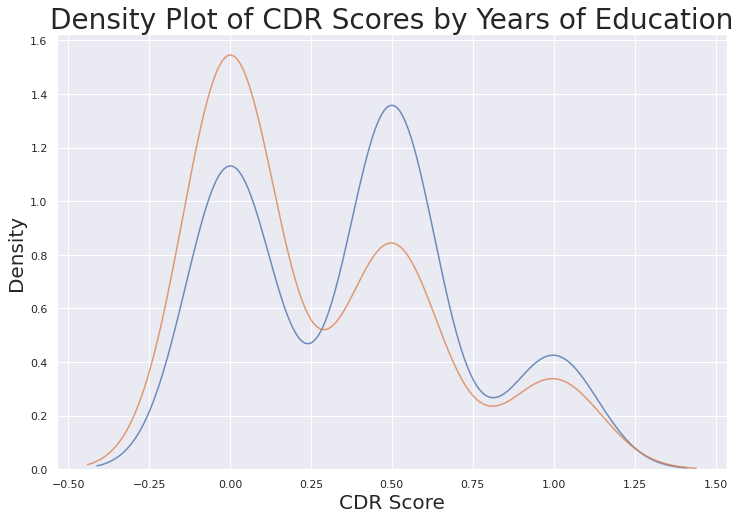

In [ ]:
# Create list of indicies of SES counts
edu_= edu_concat['EDUC'].value_counts()
edu_index = list(edu_.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 8))

# Plot each building
for el in edu_index:
    # Select the SES category
    subset = edu_concat[edu_concat['EDUC'] == el]

    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = el, shade = False, alpha = 0.8);

# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of CDR Scores by Years of Education', size = 28);
#plt.xlim([0,2]);
plt.savefig('EDU_CDR.png')

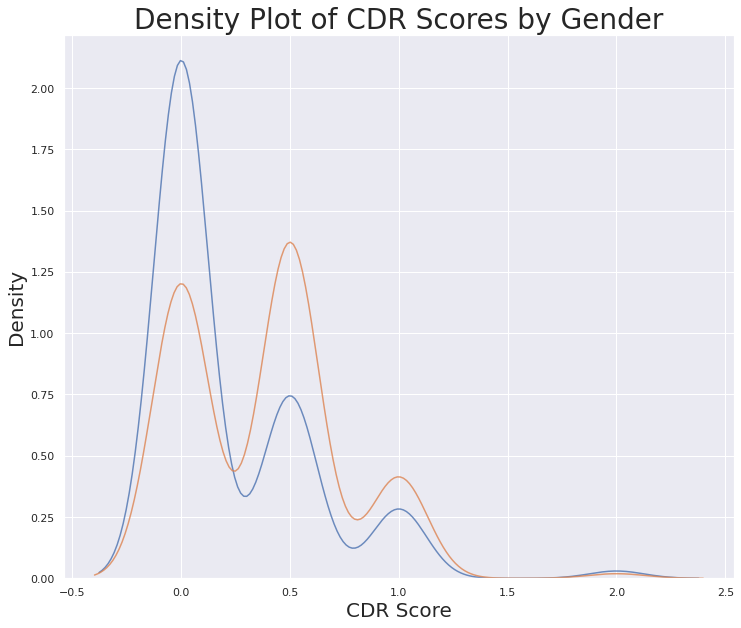

In [ ]:
# Create list of indicies of SES counts
gender_count= df['Gender'].value_counts()
gender_indicies = list(gender_count.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 10))

# Plot each building
for g in gender_indicies:
    # Select the SES category
    subset = df[df['Gender']==g]

    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = g, shade = False, alpha = 0.8);

# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of CDR Scores by Gender', size = 28, );
plt.savefig('Gender_CDR.png')

<Figure size 864x576 with 0 Axes>

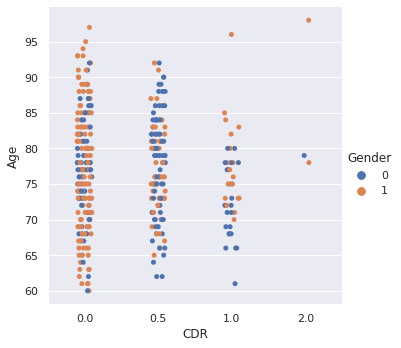

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.catplot(x='CDR',y='Age',data=df,hue='Gender')
plt.savefig('Age_CDR.png')

<Figure size 864x576 with 0 Axes>

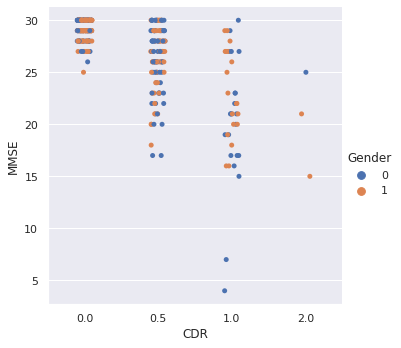

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.catplot(x='CDR',y='MMSE',data=df, hue='Gender')
plt.savefig('MMSE_CDR')

<Figure size 864x576 with 0 Axes>

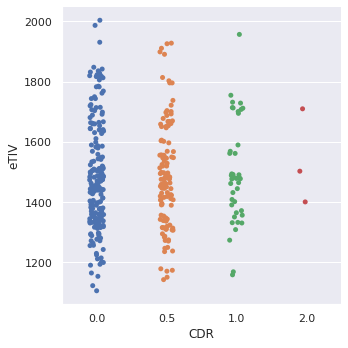

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.catplot(x='CDR',y='eTIV',data=df)

<Figure size 864x576 with 0 Axes>

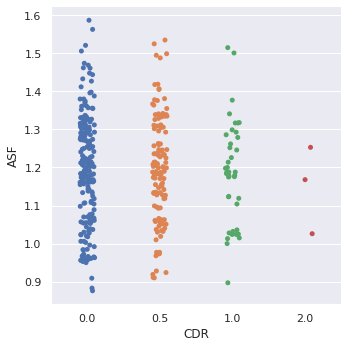

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.catplot(x='CDR',y='ASF',data=df)

<Figure size 864x576 with 0 Axes>

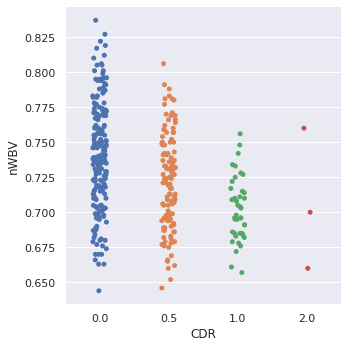

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.catplot(x='CDR', y='nWBV', data=df)

In [ ]:
df.shape

(373, 14)

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,OAS2_0001,OAS2_0001_MR1,0,1,0,87,14,4,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001,OAS2_0001_MR2,0,2,457,88,14,4,30.0,0.0,2004,0.681,0.876,0
2,OAS2_0002,OAS2_0002_MR1,1,1,0,75,12,4,23.0,0.5,1678,0.736,1.046,0
3,OAS2_0002,OAS2_0002_MR2,1,2,560,76,12,4,28.0,0.5,1738,0.713,1.010,0
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,80,12,4,22.0,0.5,1698,0.701,1.034,0


In [ ]:
selected_df = df.drop(['Subject ID','MRI ID','CDR'],axis=1)

In [ ]:
selected_df.head()

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Gender
0,0,1,0,87,14,4,27.0,1987,0.696,0.883,0
1,0,2,457,88,14,4,30.0,2004,0.681,0.876,0
2,1,1,0,75,12,4,23.0,1678,0.736,1.046,0
3,1,2,560,76,12,4,28.0,1738,0.713,1.010,0
4,1,3,1895,80,12,4,22.0,1698,0.701,1.034,0


In [ ]:
# Rename columns
rename_cols_dict = {'EDUC':'Education',
                   'Group':'Diagnosis'}
selected_df.rename(rename_cols_dict,axis=1,inplace=True)
selected_df.head()

,Diagnosis,Visit,MR Delay,Age,Education,SES,MMSE,eTIV,nWBV,ASF,Gender
0,0,1,0,87,14,4,27.0,1987,0.696,0.883,0
1,0,2,457,88,14,4,30.0,2004,0.681,0.876,0
2,1,1,0,75,12,4,23.0,1678,0.736,1.046,0
3,1,2,560,76,12,4,28.0,1738,0.713,1.010,0
4,1,3,1895,80,12,4,22.0,1698,0.701,1.034,0


In [ ]:
selected_df.dtypes

Diagnosis      int64
Visit          int64
MR Delay       int64
Age            int64
Education      int64
SES            int64
MMSE         float64
eTIV           int64
nWBV         float64
ASF          float64
Gender         int64
dtype: object

In [ ]:
target = selected_df.Diagnosis.values

predictors_df = selected_df.drop(['Diagnosis'],axis=1)

In [ ]:
predictors_df.head()

,Visit,MR Delay,Age,Education,SES,MMSE,eTIV,nWBV,ASF,Gender
0,1,0,87,14,4,27.0,1987,0.696,0.883,0
1,2,457,88,14,4,30.0,2004,0.681,0.876,0
2,1,0,75,12,4,23.0,1678,0.736,1.046,0
3,2,560,76,12,4,28.0,1738,0.713,1.010,0
4,3,1895,80,12,4,22.0,1698,0.701,1.034,0


In [ ]:
predictors_df.dtypes

Visit          int64
MR Delay       int64
Age            int64
Education      int64
SES            int64
MMSE         float64
eTIV           int64
nWBV         float64
ASF          float64
Gender         int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


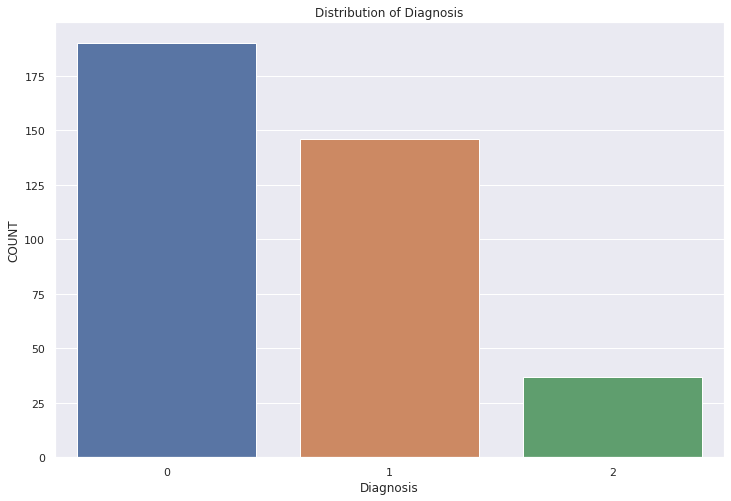

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(selected_df.Diagnosis)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('COUNT')
plt.savefig('Diagnosis_distribution.png')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(predictors_df,target,test_size=0.2,stratify=target,random_state=1)

In [ ]:
print("Training Data - Predictors",x_train.shape)
print("Testing Data - Predictors",x_test.shape)
print("Training Data - Target",y_train.shape)
print("Testing Data - Target",y_test.shape)

Training Data - Predictors (298, 10)
Testing Data - Predictors (75, 10)
Training Data - Target (298,)
Testing Data - Target (75,)


In [ ]:
from sklearn.pipeline import make_pipeline # For performing a series of operations

from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler

In [ ]:
# Build random forest classifier
methods_data = {'Original': (x_train,y_train)}

for method in methods_data.keys():
    pip_rf = make_pipeline(StandardScaler(),
                           RandomForestClassifier(n_estimators=500,
                                                  class_weight="balanced",
                                                  random_state=123))
    hyperparam_grid = {
        "randomforestclassifier__n_estimators": [10, 50, 100, 500],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5],
        "randomforestclassifier__min_samples_leaf": [1, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]}

    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring="f1_macro",
                         cv=10,
                         n_jobs=-1)

    gs_rf.fit(methods_data[method][0], methods_data[method][1])

    print("\033[1m" + "\033[0m" + "The best hyperparameters for {} data:".format(method))
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])

    print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_rf.best_score_) * 100))

The best hyperparameters for Original data:
criterion :  gini
max_features :  0.4
min_samples_leaf :  3
n_estimators :  10
Best 10-folds CV f1-score: 68.42%.


In [ ]:
# Refit RF classifier using best params
clf_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(n_estimators=10,
                                              criterion="gini",
                                              max_features=0.4,
                                              min_samples_leaf=3,
                                              class_weight="balanced",
                                              n_jobs=-1,
                                              random_state=123))


clf_rf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=0.4, min_samples_leaf=3,
                                        n_estimators=10, n_jobs=-1,
                                        random_state=123))])

In [ ]:
# Build Gradient Boosting classifier
pip_gb = make_pipeline(StandardScaler(),
                       GradientBoostingClassifier(loss="deviance",
                                                  random_state=123))

hyperparam_grid = {"gradientboostingclassifier__max_features": ["log2", 0.5],
                   "gradientboostingclassifier__n_estimators": [100, 300, 500],
                   "gradientboostingclassifier__learning_rate": [0.001, 0.01, 0.1],
                   "gradientboostingclassifier__max_depth": [1, 2, 3]}

gs_gb = GridSearchCV(pip_gb,
                      param_grid=hyperparam_grid,
                      scoring="f1_macro",
                      cv=10,
                      n_jobs=-1)

gs_gb.fit(x_train, y_train)

print("\033[1m" + "\033[0m" + "The best hyperparameters:")
print("-" * 25)
for hyperparam in gs_gb.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_gb.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_gb.best_score_) * 100))

The best hyperparameters:
-------------------------
learning_rate :  0.1
max_depth :  3
max_features :  0.5
n_estimators :  300
Best 10-folds CV f1-score: 68.41%.


In [ ]:
# Build logistic model classifier
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))

hyperparam_range = np.arange(0.5, 20.1, 0.5)

hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }

gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-1)

gs_logmodel.fit(x_train, y_train)

print("\033[1m" + "\033[0m" + "The best hyperparameters:")
print("-" * 25)
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_logmodel.best_score_) * 100))

The best hyperparameters:
-------------------------
C :  6.5
fit_intercept :  True
penalty :  l2
Best 10-folds CV f1-score: 70.47%.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

In [ ]:
#Ridge Implementation

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x, y = make_classification(n_samples=5000, n_features=10,
                           n_classes=3,
                           n_clusters_per_class=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

rc = RidgeClassifier()
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

RidgeClassifier()


RidgeClassifier(normalize=True)

In [ ]:
rc.fit(x_train, y_train)
score = rc.score(x_train, y_train)
print("Score: ", score)

#ridge ends

Score:  0.8352941176470589


In [ ]:
estimators = {"RF": clf_rf,
              "LR": gs_logmodel,
              "GBT": gs_gb
             }

# Print out accuracy score on test data
print("The accuracy rate on test data are:")
for estimator in estimators.keys():
    print("{}: {:.2f}%".format(estimator,
        accuracy_score(y_test, estimators[estimator].predict(x_test)) * 100
          ))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


The accuracy rate on test data are:
RF: 32.00%
LR: 13.47%
GBT: 18.53%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictions = gs_gb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictions.shape

(750,)

In [ ]:
selected_df.Diagnosis.value_counts()

0    190
1    146
2     37
Name: Diagnosis, dtype: int64

In [ ]:
model_names=['RandomForestClassifier','Logistic Regression','GradientBoostingClassifier']
models = [clf_rf,gs_logmodel,gs_gb]

In [ ]:
def compare_models(model):
    clf=model
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)

    # Calculating various metrics

    acc.append(accuracy_score(pred,y_test))
    #prec.append(precision_score(pred,y_test))
    #rec.append(recall_score(pred,y_test))
    #auroc.append(roc_auc_score(pred,y_test))

In [ ]:
acc=[]
prec=[]
rec=[]
auroc=[]

In [ ]:
for model in models:
    compare_models(model)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

In [ ]:
#accuracy score
d={'Modelling Algo':model_names,'Accuracy':acc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy
0,RandomForestClassifier,0.922667
1,Logistic Regression,0.868000
2,GradientBoostingClassifier,0.922667
